In [76]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
from math import log, e
import math
from sklearn.utils import shuffle
import os
import pickle
from scipy.stats import iqr
from sklearn.model_selection import train_test_split

In [77]:
my_data = genfromtxt('../Data/data_2/covtype.data', delimiter=',')

In [78]:
my_data.shape

(581012, 55)

In [79]:
for i in set(my_data[:,-1]) :
    _list = list(my_data[:,-1])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : 1.0 | count : 211840
Class : 2.0 | count : 283301
Class : 3.0 | count : 35754
Class : 4.0 | count : 2747
Class : 5.0 | count : 9493
Class : 6.0 | count : 17367
Class : 7.0 | count : 20510


In [60]:
# there are 7 classes 
# taking the majority class as normal and the class(es) with minimum number of points as anomalous
# this assumption has been done in CompreX

normal_class = 2
anomaly_class = [4 ,5 ,6 ]

In [80]:
df = pd.DataFrame(data=my_data)
print(list(df.columns))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


In [62]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
5,2579.0,132.0,6.0,300.0,-15.0,67.0,230.0,237.0,140.0,6031.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,2606.0,45.0,7.0,270.0,5.0,633.0,222.0,225.0,138.0,6256.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
7,2605.0,49.0,4.0,234.0,7.0,573.0,222.0,230.0,144.0,6228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
8,2617.0,45.0,9.0,240.0,56.0,666.0,223.0,221.0,133.0,6244.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
9,2612.0,59.0,10.0,247.0,11.0,636.0,228.0,219.0,124.0,6230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
Elevation / quantitative /meters / Elevation in meters 
Aspect / quantitative / azimuth / Aspect in degrees azimuth 
Slope / quantitative / degrees / Slope in degrees 
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features 
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features 
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway 
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice 
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice 
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice 
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points 
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation 
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation 
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

In [63]:
for i in range(0,54):
    vals = set(list(df[i]))
    print(len(vals), df[i].dtype)
    if str(df[i].dtype) == 'float64' :
        print('--')
        print('>',len(set(df[i])))
        if len(set(df[i]))>10:
            bins = 10
            labels=list(range(0,bins))
            df[i] = pd.cut(df[i], bins,labels=labels)
            print('>',set(x))
        
        
        

361 float64
--
> 361
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
67 float64
--
> 67
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
551 float64
--
> 551
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
700 float64
--
> 700
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
5785 float64
--
> 5785
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
207 float64
--
> 207
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
185 float64
--
> 185
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
255 float64
--
> 255
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
5827 float64
--
> 5827
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
2 float64
--
> 2
2 float64
--
> 2
2 float64
--
> 2
2 float64
--
> 2
2 float64
--
> 2
2 float64
--
> 2
2 float64
--
> 2
2 float64
--
> 2
2 float64
--
> 2

In [64]:
df = df.rename(columns = {54:'tag'})


In [65]:
for i in set(df['tag']) :
    _list = list(df['tag'])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : 1.0 | count : 211840
Class : 2.0 | count : 283301
Class : 3.0 | count : 35754
Class : 4.0 | count : 2747
Class : 5.0 | count : 9493
Class : 6.0 | count : 17367
Class : 7.0 | count : 20510


In [67]:
df_1 = df.loc[df['tag'].isin(anomaly_class)]
df_2 = df.loc[df['tag'].isin([normal_class])].sample(60000)
df = df_1.append(df_2,ignore_index=True)


In [68]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [69]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    
    for i in range(0,num_cols-1):   
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

attr_entropy = get_entropies(df)


attr_list = []
lb = 0.0
ub = 1.0
attr_list = []
for k,v in attr_entropy.items():
    if v > lb and v < ub:
        attr_list.append(k)

print('Valid attributes', attr_list)

0 0.9500960335590455
1 0.9698502840069276
2 0.7114897722915312
3 0.6700045417455415
4 0.4096754093857882
5 0.8477194891141194
6 0.6190722173403093
7 0.5965205648164048
8 0.8255938652060256
9 0.7803871996087879
10 0.9629774621476053
11 0.14405548881465247
12 0.9914621673056841
13 0.6014251794926398
14 0.08329304574715359
15 0.1448643714727495
16 0.1210126342042277
17 0.16079902635958243
18 0.0603918022104719
19 0.14560969707738494
20 0.00275682793775744
21 0.0035645955707669505
22 0.02521017846589197
23 0.556828506330351
24 0.2201447696083295
25 0.3480768651061394
26 0.29876650684212613
27 0.04837300634909054
28 0.0005460186885233432
29 0.06731031319964048
30 0.15054636789599413
31 0.051458899050473156
32 0.040054925405096704
33 0.11584085865198725
34 0.0005460186885233432
35 0.12507514456016933
36 0.3166557459572772
37 0.1705931372243861
38 0.009534559500157387
39 0.05855174455221143
40 0.013099282572960705
41 0.024436444521977657
42 0.6816306965314146
43 0.3670267268854985
44 0.222907

In [70]:
attr_list = ['tag'] + attr_list
df = df[attr_list]
df.columns

Index(['tag',     0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,    28,
          29,    30,    31,    32,    33,    34,    35,    36,    37,    38,
          39,    40,    41,    42,    43,    44,    45,    46,    47,    48,
          49,    51,    52,    53],
      dtype='object')

In [71]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]

# -------------------- #
def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}
    
    _idx = 0
    for col in cols:
        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}
        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[_idx] = len(id2val_dict)
        _idx += 1 
    domain_dims = list(domain_dims_dict.values())
    domain_dims_res = domain_dims_dict

    domain_dims =  np.array(domain_dims)
    print(domain_dims)
    print(domain_dims_res)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [72]:
save_dir = '../Data/data_2'

In [73]:
id_columns = list(df.columns)
try:
    id_columns.remove('tag')
except:
    pass

In [74]:
# ------------------------------------- #
# convert all values to int

for c in list(id_columns):
    df[c] = df[c].astype(str)  

In [75]:
df.head(10)

,tag,0,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,51,52,53
0,5.0,2596.0,1,0,1,2,0,8,9,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,2590.0,1,0,1,2,0,8,9,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2595.0,1,0,1,2,0,8,9,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,2606.0,1,1,1,2,0,8,8,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2605.0,1,0,1,2,0,8,9,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,2617.0,1,1,1,2,0,8,8,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.0,2612.0,1,1,1,2,0,8,8,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,2612.0,5,0,1,2,1,8,9,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5.0,2609.0,5,1,1,2,1,8,9,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5.0,2503.0,4,0,0,2,0,8,9,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:


data_df = df[(df['tag']==normal_class)] 
anom = df[(df['tag'].isin(anomaly_class)].sample(int(len(data_df)*0.04))
data_df = data_df.append(anom)

In [8]:
len(data_df)

26000

In [9]:
l1 = len(data_df[data_df['tag']==normal_class])
l2 = len(data_df)
l1 = l2-l1
print('Percentage of Anomalies :',  (l1/l2)*100 )

Percentage of Anomalies : 3.8461538461538463


In [10]:
# add in id
new_col = list(range(1,len(data_df)+1))
data_df.insert(loc=0, column='id', value=new_col)

### Exploring the attributes


In [11]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [12]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    for i in range(1,num_cols-2):
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

In [13]:
attr_entropy = get_entropies(data_df)


1 0.9764318066342891
2 0.8373090736436817
3 0.7994998473774113
4 0.8133944743221604
5 0.9598079380566528
6 0.8770565182026996
7 0.8582591642483927
8 0.9113486488160762
9 0.9408376659796021
10 0.9998766417897046
11 0.42297549123463085
12 0.9777356620387453
13 0.06828928328809253
14 0.00662370995677137
15 0.015872215234077232
16 0.0291415209663476
17 0.027190816190378067
18 0.001162220273384513
19 0.009856741976947624
20 0
21 0.004478796109459097
22 0.008667262346201701
23 0.06181658135864357
24 0.04658616033034627
25 0.09230617098762421
26 0.10271485440477879
27 0.003581138048722643
28 0
29 0.03515553164983692
30 0.044826397303541723
31 0.008667262346201701
32 0.08459396164489305
33 0.12582047166305507
34 0.03884274422633769
35 0.528365037565347
36 0.6456880148356883
37 0.2855794856731306
38 0.009462938291540563
39 0.0180201424511988
40 0.026863017440049042
41 0.002651317734468217
42 0.7041990496053215
43 0.2473830208198693
44 0.31088696308984537
45 0.45916539401413164
46 0.410927412944

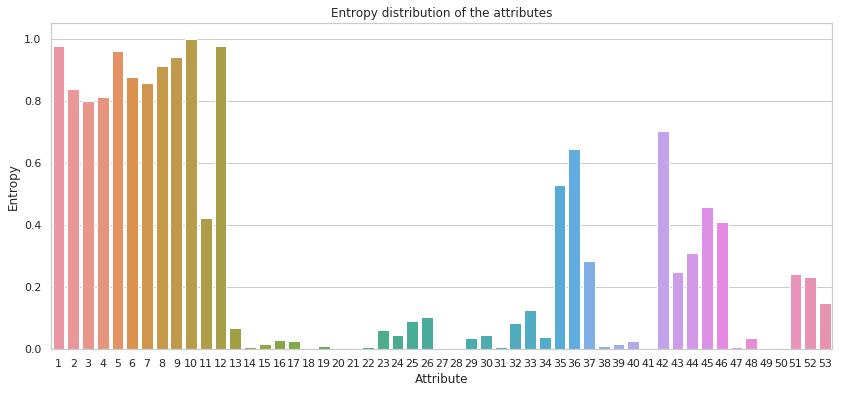

In [14]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(attr_entropy.keys()), y=list(attr_entropy.values()))
plt.xlabel('Attribute')
plt.ylabel('Entropy')
plt.title('Entropy distribution of the attributes')
plt.show()

## Filter attributes by threshold
### lb =0.05
### ub =0.95


In [15]:

lb = 0.01
ub = 0.99
attr_list = []
for k,v in attr_entropy.items():
    if v >= lb and v<= ub:
        attr_list.append(k)
        

In [16]:
len(attr_list)

38

In [17]:
valid_attr = ['id']
valid_attr.extend(attr_list)
valid_attr.append('tag')
data_df = data_df[valid_attr]

## Explore Arity of the domains

In [18]:
def get_domain_arity(df,attr_list):
    domain_arity = {a: len(set(df[a])) for a in attr_list}
    return domain_arity

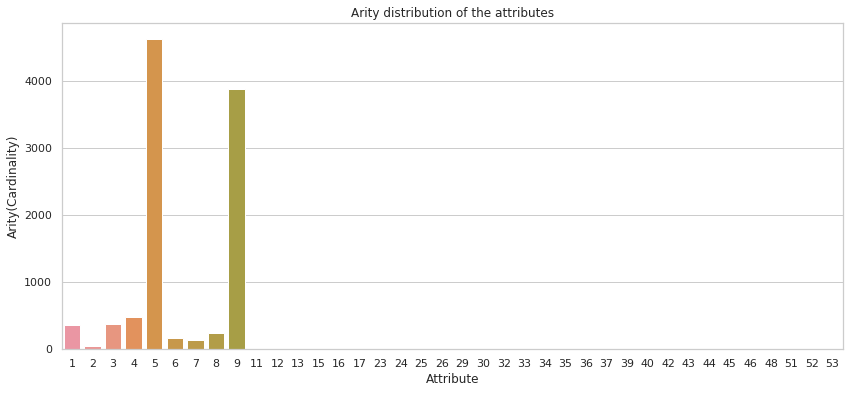

In [19]:
domain_arity = get_domain_arity(data_df,attr_list)
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(domain_arity.keys()), y=list(domain_arity.values()))
plt.xlabel('Attribute')
plt.ylabel('Arity(Cardinality)')
plt.title('Arity distribution of the attributes')
plt.show()  

In [20]:
domain_arity

{1: 361,
 2: 51,
 3: 381,
 4: 476,
 5: 4637,
 6: 173,
 7: 140,
 8: 243,
 9: 3891,
 11: 2,
 12: 2,
 13: 2,
 15: 2,
 16: 2,
 17: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 29: 2,
 30: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 39: 2,
 40: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 48: 2,
 51: 2,
 52: 2,
 53: 2}

In [33]:

# Save the data ina numpy array
_tmp = data_df[data_df['tag'] == normal_class]
_normal = list(_tmp['id'])


_tmp = data_df[(data_df['tag'] == anomaly_class_1) | (data_df['tag'] == anomaly_class_2)]
_anomaly =  list(_tmp['id'])



In [34]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]


def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}

    for col in cols:

        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}

        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[col] = len(id2val_dict)

    domain_dims = []
    domain_dims_res = {}

    for col in list(df.columns):
        if col in domain_dims_dict.keys():
            print(col)
            domain_dims_res[col] = domain_dims_dict[col]
            domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [35]:
all_ids = list(data_df['id'])
record_id_dict ={
    'all':all_ids,
    'normal':_normal,
    'anomaly':_anomaly
}

In [36]:
save_dir = '../Data/data_2'

data_df_1 = pd.DataFrame(data_df,copy=True)
try:
    del data_df_1['id']
    del data_df_1['tag']
except:
    pass

# convert all values to int
for c in list(data_df_1.columns):
    data_df_1[c] = data_df_1[c].astype(int)  
cols = list(data_df_1.columns)
convert_to_ids(data_df_1, cols , save_dir)
data_x = data_df_1.values
    

1
2
3
4
5
6
7
8
9
11
12
13
15
16
17
23
24
25
26
29
30
32
33
34
35
36
37
39
40
42
43
44
45
46
48
51
52
53


In [37]:
OP_PATH = '../Data/data_2'
data_x_file = 'data_2_x.pkl'
record_file = 'data_2_idList.pkl'

f_path_1 = os.path.join(OP_PATH,data_x_file)
f_path_2 = os.path.join(OP_PATH,record_file)

with open(f_path_1,'wb') as fh :
    pickle.dump(data_x, fh,pickle.HIGHEST_PROTOCOL)
    
with open(f_path_2,'wb') as fh :
    pickle.dump(record_id_dict, fh,pickle.HIGHEST_PROTOCOL)
    

numpy.ndarray